In [15]:
from datetime import datetime, date, time, timedelta
import pandas as pd
from matplotlib import pyplot as plt

In [16]:
n = 2
dist = 200 * n
kml_G = 13.0
price_LG = 7.9
kml_E = 11.5
price_LE = 5.7
capacity = 50

### Fuel calculations
* `Autonomy (Km)`: The distance the car can go when the tank is full
* `Km/autonomy`: The ratio between the distance and the autonomy
* `L/100 Km`: Liters per 100 Km
* `R$/Km`: The cost per Km
* `R$/fill`: The cost to get the tank full
* `R$/100 Km`: The cost to go 100 Km
* `Volume (L)`: The amount of fuel needed
* `Cost (R$)`: The cost of the fuel
* `R$ ratio`: Price ratio between the fuels
* `Km ratio`: Km ration each fuel can go

In [17]:
df_fuel = pd.DataFrame(
	{
		'Fuel'				: ['Gasoline', 'Ethanol'],
		'R$/L'				: [price_LG, price_LE],
		'Km/L'				: [kml_G, kml_E]
	}
)

df_fuel['Autonomy (Km)']	= capacity * df_fuel['Km/L']
df_fuel['Km/autonomy']		= dist / df_fuel['Autonomy (Km)']
df_fuel['L/100 Km'] 		= 100 / df_fuel['Km/L']
df_fuel['R$/Km']			= df_fuel['R$/L'] / df_fuel['Km/L']
df_fuel['R$/fill']			= df_fuel['R$/L'] * capacity
df_fuel['R$/100 Km']		= df_fuel['R$/L'] * df_fuel['L/100 Km']
df_fuel['Volume (L)']		= dist / df_fuel['Km/L']
df_fuel['Cost (R$)']		= df_fuel['R$/L'] * df_fuel['Volume (L)']
df_fuel['R$ ratio']			= [price_LG / price_LE, price_LE / price_LG]
df_fuel['Km ratio']			= [kml_G / kml_E, kml_E / kml_G]

In [18]:
one_way = int(dist / n)
avg_speed = 80

### Trip calculations
* `Distance (Km)`: Trip distance
* `AVG speed (Km/h)`: Average trip speed
* `Departure time`: Date and time the trip starts
* `Arrival time`: Estimated date and time the trip ends
* `Elapsed time`: Trip total duration
* `Elapsed time hh:mm:ss`: Trip total duration in the format hh:mm:ss

In [19]:
df_trip = pd.DataFrame(
	{
		'Distance (Km)'		: [one_way],
		'AVG speed (Km/h)'	: [avg_speed],
		# 'Departure time'	: [datetime.combine(datetime(2022, 4, 28), time(7, 0, 0))]
		'Departure time'	: [datetime.combine(date.today(), time(7, 0, 0))]
	}
)
df_trip['Arrival time'] = df_trip['Departure time'] + timedelta(seconds = int((df_trip['Distance (Km)'] / df_trip['AVG speed (Km/h)']) * 3600))
df_trip['Elapsed time'] = df_trip['Arrival time'] - df_trip['Departure time']
df_time = pd.to_timedelta(df_trip['Elapsed time']).dt.components[['days', 'hours', 'minutes', 'seconds']]
df_time['hours'] = df_time['hours'].add(df_time.pop('days') * 24)

df_trip['Elapsed time hh:mm:ss'] = df_time.astype(str).agg(lambda s: ':'.join(s.str.zfill(2)), axis=1)

### Fuel costs

In [20]:
print ('Fuel costs')
print ('Tank capacity:', capacity, 'L | Distance:', dist, 'Km')
df_fuel

Fuel costs
Tank capacity: 50 L | Distance: 400 Km


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
0,Gasoline,7.9,13.0,650.0,0.615385,7.692308,0.607692,395.0,60.769231,30.769231,243.076923,1.385965,1.130435
1,Ethanol,5.7,11.5,575.0,0.695652,8.695652,0.495652,285.0,49.565217,34.782609,198.260870,0.721519,0.884615


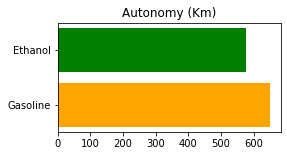

In [21]:
fig = plt.figure(figsize=(4, 2))

plt.barh(df_fuel.Fuel, df_fuel['Autonomy (Km)'], color=['orange', 'green'])
plt.title("Autonomy (Km)")

plt.show()

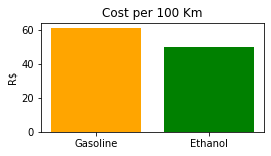

In [22]:
fig = plt.figure(figsize=(4, 2))

plt.bar(df_fuel['Fuel'], df_fuel['R$/100 Km'], color=['orange', 'green'])
plt.ylabel("R$")
plt.title("Cost per 100 Km")
plt.show()

### Information

In [23]:
print('Trip calculations')
df_trip

Trip calculations


,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00


In [24]:
print("Fuel's lowest value")
df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].min()]

Fuel's lowest value


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
1,Ethanol,5.7,11.5,575.0,0.695652,8.695652,0.495652,285.0,49.565217,34.782609,198.26087,0.721519,0.884615


In [25]:
print("Fuel's highest value")
df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].max()]

Fuel's highest value


,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio
0,Gasoline,7.9,13.0,650.0,0.615385,7.692308,0.607692,395.0,60.769231,30.769231,243.076923,1.385965,1.130435


In [26]:
print('Trip with the cheapest fuel')
df_cheaper = df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].min()].reset_index()
pd.concat([df_cheaper, df_trip], axis=1)

Trip with the cheapest fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,1,Ethanol,5.7,11.5,575.0,0.695652,8.695652,0.495652,285.0,49.565217,34.782609,198.26087,0.721519,0.884615,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00


In [27]:
print('Trip with the most expensive fuel')
df_cheaper = df_fuel[df_fuel['R$/Km'] == df_fuel['R$/Km'].max()].reset_index()
pd.concat([df_cheaper, df_trip], axis=1)

Trip with the most expensive fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,0,Gasoline,7.9,13.0,650.0,0.615385,7.692308,0.607692,395.0,60.769231,30.769231,243.076923,1.385965,1.130435,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00


In [28]:
print("Trip with the highest autonomy fuel")
df_most_autonomy = df_fuel[df_fuel['Autonomy (Km)'] == df_fuel['Autonomy (Km)'].max()].reset_index()
pd.concat([df_most_autonomy, df_trip], axis=1)

Trip with the highest autonomy fuel


,index,Fuel,R$/L,Km/L,Autonomy (Km),Km/autonomy,L/100 Km,R$/Km,R$/fill,R$/100 Km,Volume (L),Cost (R$),R$ ratio,Km ratio,Distance (Km),AVG speed (Km/h),Departure time,Arrival time,Elapsed time,Elapsed time hh:mm:ss
0,0,Gasoline,7.9,13.0,650.0,0.615385,7.692308,0.607692,395.0,60.769231,30.769231,243.076923,1.385965,1.130435,200,80,2022-05-05 07:00:00,2022-05-05 09:30:00,0 days 02:30:00,02:30:00
